In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [2]:
#Train data
train_cat = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_CATEGORICAL_METADATA_new.csv")
train_fcm = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_Q = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_QUANTITATIVE_METADATA_new.csv")
train_sol = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAINING_SOLUTIONS.csv")

In [3]:
# Test data
test_cat = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_CATEGORICAL.csv")
test_fcm = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_Q = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_QUANTITATIVE_METADATA.csv")

In [4]:
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [5]:
train_fcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [6]:
train_Q.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [7]:
train_sol.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [8]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [9]:
train_fcm.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [10]:
train_Q.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [11]:
train_sol.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [12]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [13]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

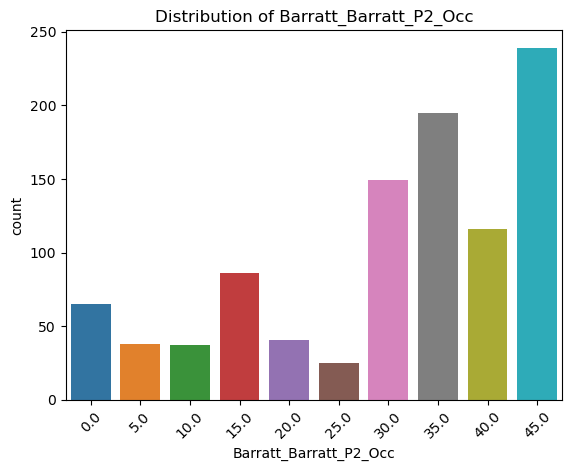

In [14]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

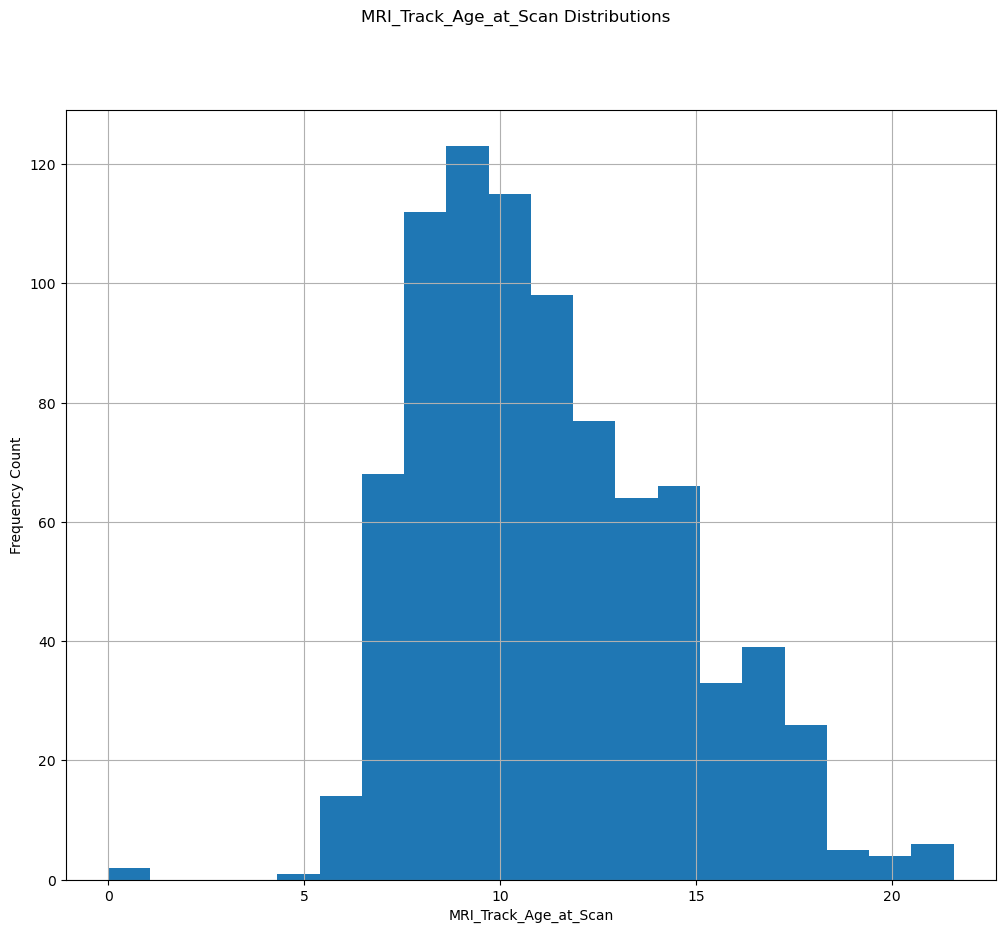

In [15]:
# Distribution of MRI_Track_Age_at_Scan
train_Q['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


In [16]:
# ADHD distribution
train_sol['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

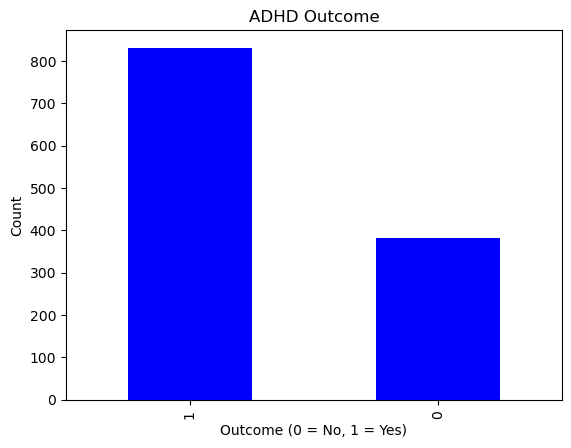

In [17]:
train_sol['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [18]:
# Gender distribution
train_sol['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

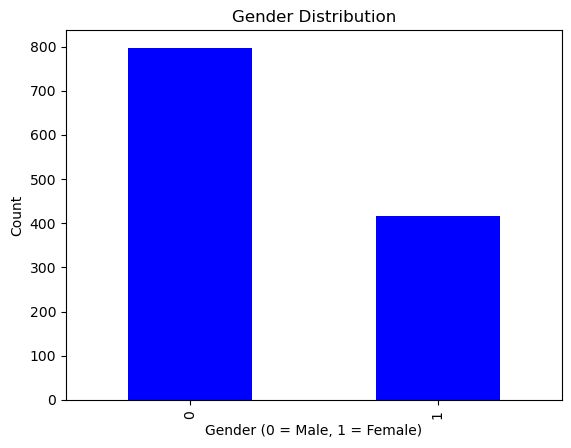

In [19]:
train_sol['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

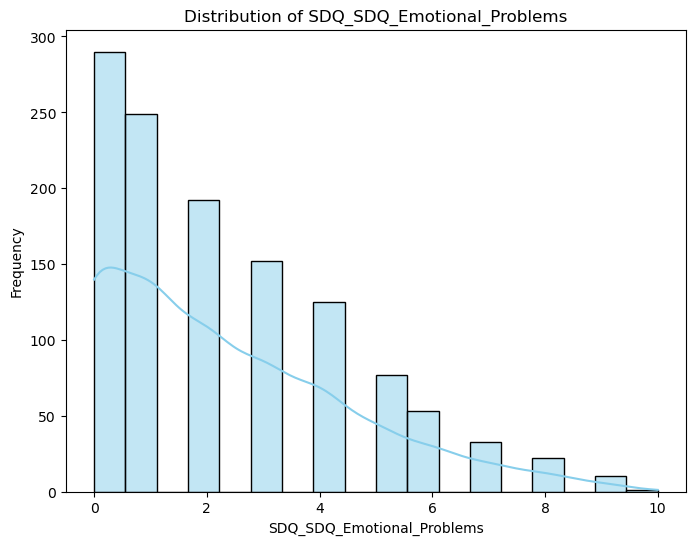

In [20]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Q['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

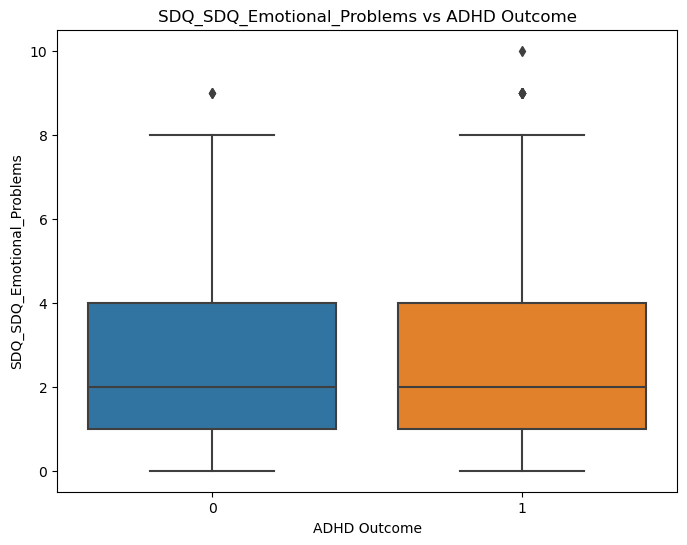

In [21]:
# Check for correlation with ADHD outcome
train_Q_copy = train_Q.copy()
train_Q_copy['ADHD_Outcome'] = train_sol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Q_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


In [23]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [24]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_sol['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


In [25]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [31]:

missing_percent = train_cat.isnull().mean() * 100

# Convert to a DataFrame for better formatting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by descending percentage
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)

edu_percent = train_cat['Barratt_Barratt_P2_Edu'].value_counts(normalize=True) * 100
print("Barratt_Barratt_P2_Edu (percentages):\n", edu_percent.sort_index())

edu_percent = train_cat['Barratt_Barratt_P2_Occ'].value_counts(normalize=True) * 100
print("Barratt_Barratt_P2_Occ (percentages):\n", edu_percent.sort_index())

                             Column  Missing_Percentage
8            Barratt_Barratt_P2_Occ           18.301731
7            Barratt_Barratt_P2_Edu           16.323166
3       PreInt_Demos_Fam_Child_Race            4.451772
2  PreInt_Demos_Fam_Child_Ethnicity            3.544930
6            Barratt_Barratt_P1_Occ            2.555647
5            Barratt_Barratt_P1_Edu            1.236603
4           MRI_Track_Scan_Location            0.247321
0                    participant_id            0.000000
1            Basic_Demos_Study_Site            0.000000
Barratt_Barratt_P2_Edu (percentages):
 Barratt_Barratt_P2_Edu
3.0      0.492611
6.0      1.379310
9.0      4.334975
12.0    15.960591
15.0    16.354680
18.0    29.655172
21.0    31.822660
Name: proportion, dtype: float64
Barratt_Barratt_P2_Occ (percentages):
 Barratt_Barratt_P2_Occ
0.0      6.559031
5.0      3.834511
10.0     3.733602
15.0     8.678103
20.0     4.137235
25.0     2.522704
30.0    15.035318
35.0    19.677094
40.0    11.70

In [33]:
for col in train_cat.columns[1:]:  # skip participant_id
    train_cat[col] = train_cat[col].fillna(train_cat[col].mode()[0])

# Calculate percentage of missing data per column
missing_percent = train_cat.isnull().mean() * 100

# Convert to a DataFrame for better formatting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by descending percentage
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)

                             Column  Missing_Percentage
0                    participant_id                 0.0
1            Basic_Demos_Study_Site                 0.0
2  PreInt_Demos_Fam_Child_Ethnicity                 0.0
3       PreInt_Demos_Fam_Child_Race                 0.0
4           MRI_Track_Scan_Location                 0.0
5            Barratt_Barratt_P1_Edu                 0.0
6            Barratt_Barratt_P1_Occ                 0.0
7            Barratt_Barratt_P2_Edu                 0.0
8            Barratt_Barratt_P2_Occ                 0.0


In [34]:
# Calculate percentage of missing data per column
missing_percent = train_fcm.isnull().mean() * 100

# Convert to a DataFrame for better formatting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by descending percentage
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)

                     Column  Missing_Percentage
0            participant_id                 0.0
13265   84throw_119thcolumn                 0.0
13272   84throw_126thcolumn                 0.0
13271   84throw_125thcolumn                 0.0
13270   84throw_124thcolumn                 0.0
...                     ...                 ...
6633    36throw_135thcolumn                 0.0
6632    36throw_134thcolumn                 0.0
6631    36throw_133thcolumn                 0.0
6630    36throw_132thcolumn                 0.0
19900  198throw_199thcolumn                 0.0

[19901 rows x 2 columns]


In [35]:
missing_percent = train_Q.isnull().mean() * 100

missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)



                        Column  Missing_Percentage
18       MRI_Track_Age_at_Scan           29.678483
2         ColorVision_CV_Score            1.896125
1                EHQ_EHQ_Total            1.071723
3               APQ_P_APQ_P_CP            0.989283
4               APQ_P_APQ_P_ID            0.989283
5              APQ_P_APQ_P_INV            0.989283
6              APQ_P_APQ_P_OPD            0.989283
7               APQ_P_APQ_P_PM            0.989283
8               APQ_P_APQ_P_PP            0.989283
14       SDQ_SDQ_Hyperactivity            0.741962
17           SDQ_SDQ_Prosocial            0.741962
16       SDQ_SDQ_Peer_Problems            0.741962
15       SDQ_SDQ_Internalizing            0.741962
9     SDQ_SDQ_Conduct_Problems            0.741962
13   SDQ_SDQ_Generating_Impact            0.741962
12       SDQ_SDQ_Externalizing            0.741962
11  SDQ_SDQ_Emotional_Problems            0.741962
10  SDQ_SDQ_Difficulties_Total            0.741962
0               participant_id 

In [38]:
# Version 2

# Impute missing values with the mean for specific columns
mean_cols = ['EHQ_EHQ_Total'] 
train_Q[mean_cols] = train_Q[mean_cols].apply(lambda x: x.fillna(x.mean()))

# Impute missing values with the median for specific columns
median_cols = ['MRI_Track_Age_at_Scan'] 
train_Q[median_cols] = train_Q[median_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values with the mode for specific columns
mode_cols = [
    'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Difficulties_Total', 'ColorVision_CV_Score', 'EHQ_EHQ_Total',
    'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP'
]
train_Q[mode_cols] = train_Q[mode_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Calculate the percentage of missing values for each column
missing_percent = (train_Q.isnull().sum() / len(train_Q)) * 100

# Create a DataFrame to show the columns and their missing percentage
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort the DataFrame by the missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Print the missing values DataFrame
print(missing_df)


                        Column  Missing_Percentage
0               participant_id                 0.0
10  SDQ_SDQ_Difficulties_Total                 0.0
17           SDQ_SDQ_Prosocial                 0.0
16       SDQ_SDQ_Peer_Problems                 0.0
15       SDQ_SDQ_Internalizing                 0.0
14       SDQ_SDQ_Hyperactivity                 0.0
13   SDQ_SDQ_Generating_Impact                 0.0
12       SDQ_SDQ_Externalizing                 0.0
11  SDQ_SDQ_Emotional_Problems                 0.0
9     SDQ_SDQ_Conduct_Problems                 0.0
1                EHQ_EHQ_Total                 0.0
8               APQ_P_APQ_P_PP                 0.0
7               APQ_P_APQ_P_PM                 0.0
6              APQ_P_APQ_P_OPD                 0.0
5              APQ_P_APQ_P_INV                 0.0
4               APQ_P_APQ_P_ID                 0.0
3               APQ_P_APQ_P_CP                 0.0
2         ColorVision_CV_Score                 0.0
18       MRI_Track_Age_at_Scan 

In [39]:
train_cat_FCM = pd.merge(train_cat, train_fcm, on = 'participant_id')

In [40]:
train_df = pd.merge(train_cat_FCM, train_Q, on = 'participant_id')

# ensure it looks accurate
train_df.head()

,participant_id,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,0throw_1thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,4,1.0,0.0,3.0,21.0,45.0,21.0,45.0,0.361339,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0.051430,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,10.739219
2,04X1eiS79T4B,1,1.0,2.0,2.0,9.0,0.0,21.0,45.0,-0.305747,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0.450442,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,1,0.0,1.0,2.0,12.0,0.0,21.0,45.0,0.415220,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [44]:
missing_percent = test_cat.isnull().mean() * 100

missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)


print(missing_df)

                             Column  Missing_Percentage
9            Barratt_Barratt_P2_Occ           13.815789
8            Barratt_Barratt_P2_Edu           11.842105
4       PreInt_Demos_Fam_Child_Race            1.973684
3  PreInt_Demos_Fam_Child_Ethnicity            0.986842
6            Barratt_Barratt_P1_Edu            0.328947
7            Barratt_Barratt_P1_Occ            0.328947
0                    participant_id            0.000000
1           Basic_Demos_Enroll_Year            0.000000
2            Basic_Demos_Study_Site            0.000000
5           MRI_Track_Scan_Location            0.000000


In [45]:


# Fill missing entries with mode for the Categorical Dataset (Test)
test_cat.update(test_cat.iloc[:, 1:].apply(lambda x: x.fillna(x.mode()[0]), axis=0))

# Calculate the missing percentage for each column
missing_percent = (test_cat.isnull().sum() / len(test_cat)) * 100

# Create a DataFrame to format the missing percentage information
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort the DataFrame by the missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display the missing percentage DataFrame
print(missing_df)

# Display dataset shape (rows, columns)
print("Dataset shape (rows, columns):", test_cat.shape)


                             Column  Missing_Percentage
0                    participant_id                 0.0
1           Basic_Demos_Enroll_Year                 0.0
2            Basic_Demos_Study_Site                 0.0
3  PreInt_Demos_Fam_Child_Ethnicity                 0.0
4       PreInt_Demos_Fam_Child_Race                 0.0
5           MRI_Track_Scan_Location                 0.0
6            Barratt_Barratt_P1_Edu                 0.0
7            Barratt_Barratt_P1_Occ                 0.0
8            Barratt_Barratt_P2_Edu                 0.0
9            Barratt_Barratt_P2_Occ                 0.0
Dataset shape (rows, columns): (304, 10)


In [46]:
test_cat = test_cat.drop(columns='Basic_Demos_Enroll_Year')
test_cat.head()

,participant_id,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,4,0.0,0.0,4,21.0,45.0,21.0,30.0
2,ULliyEXjy4OV,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [49]:


missing_cols = train_cat.columns.difference(test_cat.columns)
test_cat[missing_cols] = 0  # Add missing columns with 0 values

test_cat = test_cat[test_cat.columns]

# Combine the encoded columns with the rest of the DataFrame
cat_test_final = test_cat.copy()

# Ensure it looks correct
cat_test_final.head()


,participant_id,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,4,0.0,0.0,4,21.0,45.0,21.0,30.0
2,ULliyEXjy4OV,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [51]:
# Calculate percentage of missing data per column
missing_percent = test_Q.isnull().mean() * 100

# Convert to a DataFrame for better formatting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by descending percentage
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)

# Calculate percentage of missing data per column
missing_percent = test_fcm.isnull().mean() * 100

# Convert to a DataFrame for better formatting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by descending percentage
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display
print(missing_df)

                        Column  Missing_Percentage
9     SDQ_SDQ_Conduct_Problems            9.868421
17           SDQ_SDQ_Prosocial            9.868421
15       SDQ_SDQ_Internalizing            9.868421
14       SDQ_SDQ_Hyperactivity            9.868421
13   SDQ_SDQ_Generating_Impact            9.868421
12       SDQ_SDQ_Externalizing            9.868421
11  SDQ_SDQ_Emotional_Problems            9.868421
10  SDQ_SDQ_Difficulties_Total            9.868421
16       SDQ_SDQ_Peer_Problems            9.868421
7               APQ_P_APQ_P_PM            4.934211
6              APQ_P_APQ_P_OPD            4.934211
5              APQ_P_APQ_P_INV            4.934211
4               APQ_P_APQ_P_ID            4.934211
3               APQ_P_APQ_P_CP            4.934211
8               APQ_P_APQ_P_PP            4.934211
2         ColorVision_CV_Score            2.960526
1                EHQ_EHQ_Total            0.328947
0               participant_id            0.000000
18       MRI_Track_Age_at_Scan 

In [54]:


# Fill missing entries with the mean for specific columns
mean_cols = ['EHQ_EHQ_Total']
test_Q[mean_cols] = test_Q[mean_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing entries with the median for specific columns
median_cols = ['MRI_Track_Age_at_Scan']  # or any other column you want
test_Q[median_cols] = test_Q[median_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing entries with the mode for specific columns
mode_cols = [
    'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Difficulties_Total', 'ColorVision_CV_Score', 'EHQ_EHQ_Total',
    'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP'
]
test_Q[mode_cols] = test_Q[mode_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Calculate the missing percentage for each column
missing_percent = (test_Q.isnull().sum() / len(test_Q)) * 100

# Create a DataFrame to format the missing percentage information
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']

# Sort by the missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

# Display the missing percentage DataFrame
print(missing_df)


                        Column  Missing_Percentage
0               participant_id                 0.0
10  SDQ_SDQ_Difficulties_Total                 0.0
17           SDQ_SDQ_Prosocial                 0.0
16       SDQ_SDQ_Peer_Problems                 0.0
15       SDQ_SDQ_Internalizing                 0.0
14       SDQ_SDQ_Hyperactivity                 0.0
13   SDQ_SDQ_Generating_Impact                 0.0
12       SDQ_SDQ_Externalizing                 0.0
11  SDQ_SDQ_Emotional_Problems                 0.0
9     SDQ_SDQ_Conduct_Problems                 0.0
1                EHQ_EHQ_Total                 0.0
8               APQ_P_APQ_P_PP                 0.0
7               APQ_P_APQ_P_PM                 0.0
6              APQ_P_APQ_P_OPD                 0.0
5              APQ_P_APQ_P_INV                 0.0
4               APQ_P_APQ_P_ID                 0.0
3               APQ_P_APQ_P_CP                 0.0
2         ColorVision_CV_Score                 0.0
18       MRI_Track_Age_at_Scan 

In [55]:
test_cat_FCM = pd.merge(test_cat, test_fcm, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Q, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,0throw_1thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,4,0.0,0.0,4,21.0,30.0,18.0,30.0,0.548480,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,4,0.0,0.0,4,21.0,45.0,21.0,30.0,0.427740,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,4,0.0,0.0,4,21.0,40.0,18.0,40.0,0.139572,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,4,0.0,0.0,3,21.0,45.0,21.0,45.0,0.133561,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,4,2.0,0.0,4,18.0,0.0,21.0,45.0,0.126699,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [57]:
# Check and sort NA values from highest to lowest
na_counts = train_df.isna().sum().sort_values(ascending=False)
print(na_counts)

Basic_Demos_Study_Site    0
84throw_129thcolumn       0
84throw_136thcolumn       0
84throw_135thcolumn       0
84throw_134thcolumn       0
                         ..
36throw_135thcolumn       0
36throw_134thcolumn       0
36throw_133thcolumn       0
36throw_132thcolumn       0
MRI_Track_Age_at_Scan     0
Length: 19926, dtype: int64


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


x=train_df
y=train_sol.set_index('participant_id')
y.head()
for col in y.columns:
    print(f"\nDistribution for {col}:")
    dist = y[col].value_counts(normalize=True) * 100  # Normalize for percentage
    print(dist.sort_index().to_string(index=True, float_format="%.2f%%"))


Distribution for ADHD_Outcome:
ADHD_Outcome
0   31.49%
1   68.51%

Distribution for Sex_F:
Sex_F
0   65.70%
1   34.30%


In [60]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(x, y['Sex_F'])

# Select features with non-zero coefficients
selected_features_Sex = x.columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Race',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', '0throw_60thcolumn',
       '0throw_70thcolumn', '0throw_86thcolumn', '0throw_87thcolumn',
       ...
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=739)


In [61]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(x, y['ADHD_Outcome']) 

# Select features with non-zero coefficients
selected_features_ADHD = x.columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', '0throw_4thcolumn',
       '0throw_6thcolumn',
       ...
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=698)


In [62]:
# Step 1: Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))
x = x[common_features]
x.shape

(1213, 52)

In [63]:
y_combined = y[['ADHD_Outcome', 'Sex_F']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify=y_combined)
print("Train set distribution:")
print(y_train['ADHD_Outcome'].value_counts(normalize=True) * 100)
print(y_train['Sex_F'].value_counts(normalize=True) * 100)

print("\nTest set distribution:")
print(y_test['ADHD_Outcome'].value_counts(normalize=True) * 100)
print(y_test['Sex_F'].value_counts(normalize=True) * 100)

#stratified split done to make train and test follow the original data's distribution

Train set distribution:
ADHD_Outcome
1    68.551237
0    31.448763
Name: proportion, dtype: float64
Sex_F
0    65.724382
1    34.275618
Name: proportion, dtype: float64

Test set distribution:
ADHD_Outcome
1    68.406593
0    31.593407
Name: proportion, dtype: float64
Sex_F
0    65.659341
1    34.340659
Name: proportion, dtype: float64


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)



Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.33      0.10      0.15       115
           1       0.69      0.91      0.78       249

    accuracy                           0.65       364
   macro avg       0.51      0.50      0.47       364
weighted avg       0.57      0.65      0.58       364

Confusion Matrix for ADHD_Outcome:
[[ 11 104]
 [ 22 227]]


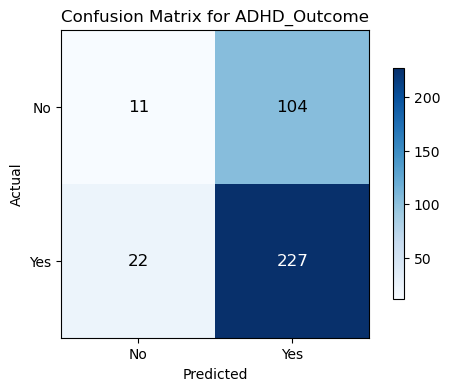


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       239
           1       0.39      0.10      0.15       125

    accuracy                           0.64       364
   macro avg       0.52      0.51      0.46       364
weighted avg       0.57      0.64      0.56       364

Confusion Matrix for Sex_F:
[[220  19]
 [113  12]]


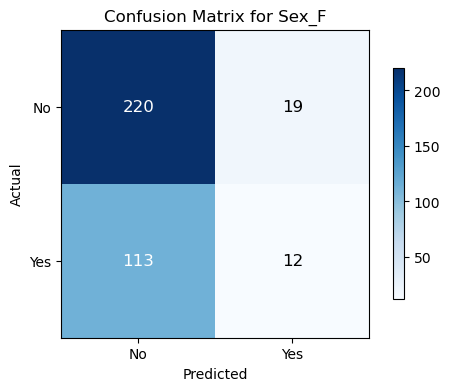

Best hyperparameters found:  {'estimator__metric': 'minkowski', 'estimator__n_neighbors': 13, 'estimator__weights': 'uniform'}


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define base KNN model
knn = KNeighborsClassifier()

# Wrap in MultiOutputClassifier
multi_knn = MultiOutputClassifier(knn)

# Define parameter grid
param_grid = {
    'estimator__n_neighbors': [3,5,7, 9, 11, 13],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['minkowski', 'manhattan', 'chebyshev']
}

# Run GridSearchCV
grid_search = GridSearchCV(multi_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best estimator and predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Convert predictions to DataFrame for evaluation
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)


for col in y_test.columns:
    print(f"\nClassification report for {col}:\n")
    print(classification_report(y_test[col], y_pred_df[col]))

    # Confusion Matrix
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
   

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar(shrink=0.75)
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

    # Annotate each cell with its numeric value
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print best parameters
print("Best hyperparameters found: ", grid_search.best_params_)



Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.32      0.19      0.24       115
           1       0.68      0.81      0.74       249

    accuracy                           0.62       364
   macro avg       0.50      0.50      0.49       364
weighted avg       0.57      0.62      0.58       364

Confusion Matrix for ADHD_Outcome:
[[ 22  93]
 [ 47 202]]


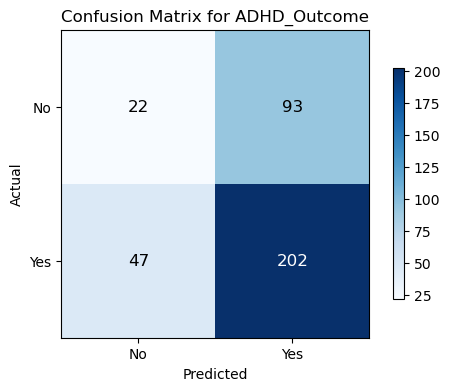


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       239
           1       0.42      0.04      0.07       125

    accuracy                           0.65       364
   macro avg       0.54      0.51      0.43       364
weighted avg       0.58      0.65      0.54       364

Confusion Matrix for Sex_F:
[[232   7]
 [120   5]]


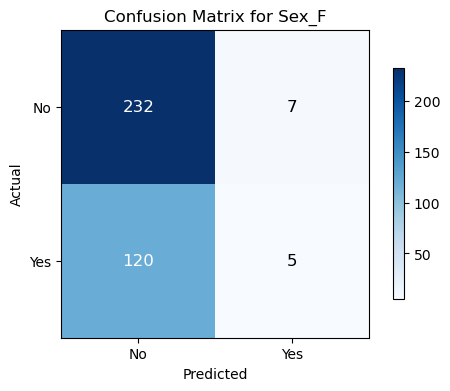

Best hyperparameters found:  {'estimator__criterion': 'entropy', 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2}


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Assuming cm is your confusion matrix numpy array

# Define base Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Wrap in MultiOutputClassifier
multi_tree = MultiOutputClassifier(tree)

# Define hyperparameter grid
param_grid = {
    'estimator__max_depth': [3, 5, 10, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy']
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(multi_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best model and make predictions
best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test_scaled)

# Convert predictions to DataFrame for evaluation
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)

# Print classification report for each target
for col in y_test.columns:
    print(f"\nClassification report for {col}:\n")
    print(classification_report(y_test[col], y_pred_df[col]))

    # Confusion Matrix
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
   

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar(shrink=0.75)
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

    # Annotate each cell with its numeric value
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print best parameters
print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'estimator__bootstrap': True, 'estimator__criterion': 'entropy', 'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 15}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.32      0.19      0.24       115
           1       0.68      0.81      0.74       249

    accuracy                           0.62       364
   macro avg       0.50      0.50      0.49       364
weighted avg       0.57      0.62      0.58       364

Confusion Matrix for ADHD_Outcome:
[[ 22  93]
 [ 47 202]]


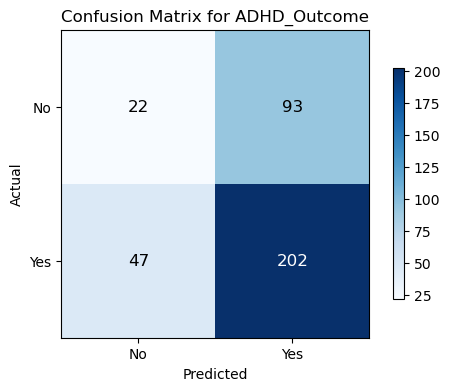


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       239
           1       0.42      0.04      0.07       125

    accuracy                           0.65       364
   macro avg       0.54      0.51      0.43       364
weighted avg       0.58      0.65      0.54       364

Confusion Matrix for Sex_F:
[[232   7]
 [120   5]]


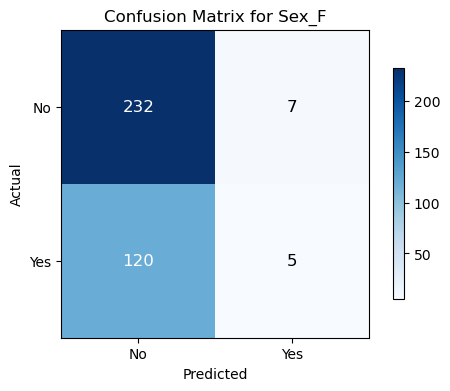

Best hyperparameters found:  {'estimator__bootstrap': True, 'estimator__criterion': 'entropy', 'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 15}


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
test_error_rates = []

param_grid = {
    'estimator__n_estimators': [5, 10, 15],
    'estimator__max_depth': [None, 10, 20],
    'estimator__max_features': [ 'sqrt', 'log2'],
    'estimator__bootstrap': [True,False],
    'estimator__criterion': ['gini', 'entropy', 'log_loss']
}
rf = RandomForestClassifier()
multi_rf = MultiOutputClassifier(rf)
grid_search = GridSearchCV(multi_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

   
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 8. Evaluate
y_pred = best_model.predict(X_test_scaled)
for col in y_test.columns:
    print(f"\nClassification report for {col}:\n")
    print(classification_report(y_test[col], y_pred_df[col]))

    # Confusion Matrix
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
   

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar(shrink=0.75)
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

    # Annotate each cell with its numeric value
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
# Print best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.29      0.19      0.23       108
           1       0.70      0.81      0.75       256

    accuracy                           0.62       364
   macro avg       0.50      0.50      0.49       364
weighted avg       0.58      0.62      0.60       364

Confusion Matrix for ADHD_Outcome:
[[ 20  88]
 [ 49 207]]


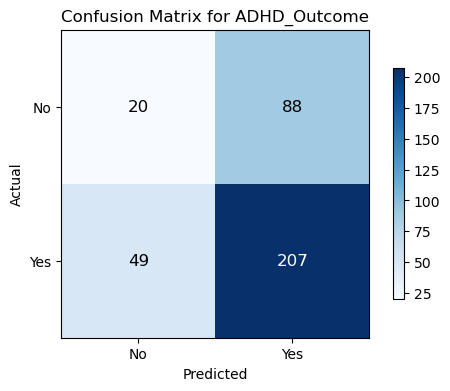


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       239
           1       0.33      0.03      0.06       125

    accuracy                           0.65       364
   macro avg       0.49      0.50      0.42       364
weighted avg       0.55      0.65      0.53       364

Confusion Matrix for Sex_F:
[[231   8]
 [121   4]]


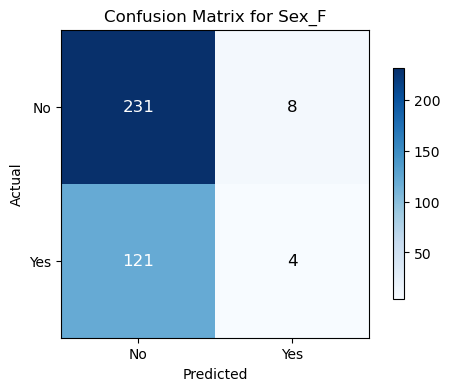

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load data
x1 = train_df
y1 = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAINING_SOLUTIONS.csv")
y1 = y1.set_index('participant_id')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
x1_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
x1_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Base model
model_log = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Wrap it with MultiOutputClassifier
multi_log = MultiOutputClassifier(model_log)

# Define parameter grid
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Grid search with cross-validation
grid_search = GridSearchCV(multi_log, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(x1_train_scaled, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(x1_test_scaled)

for col in y_test.columns:
    print(f"\nClassification report for {col}:\n")
    print(classification_report(y_test[col], y_pred_df[col]))

    # Confusion Matrix
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
   

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar(shrink=0.75)
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

    # Annotate each cell with its numeric value
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()